In [11]:
import jax
import jax.numpy as jnp
import numpy as np
import flashbax as fbx
from flashbax.vault import Vault
from scipy.stats import norm
import matplotlib.pyplot as plt
import copy
import flashbax
from flashbax.buffers.trajectory_buffer import TrajectoryBufferState
import pickle
import seaborn as sns

# Processing coverage information for a multi-agent dataset
We start with:
- values, reverse indexes (for rebuilding/reference back to original vault), counts

We want the following:
- a measure of diversity of actions per state
- a measure of diversity of observed rewards per state-action pair
- a measure of how much of the data is unique
- a measure of skewness - maybe an exponential like we see with that one law

Further, we want: 
- for each task, 
- - for each dataset - random, other
- - - SACo
- - - joint OACo
- - - per-agent OACo
- - Then, for each dataset notequalto random
- - - relative SACo
- - - relative OACo
- - - relative per-agent OACo

In [12]:
# rel_dir="../vaults/smac_v1/2s3z"
# vault_name = "500_000"
rel_dir="../vaults"
vault_name = "500000_5m_vs_6m"
# rel_dir="../vaults"
# vault_name = "2halfcheetah.vlt"
# rel_dir="../vaults/smac_v2/terran_5_vs_5"
# vault_name = "500_000"

keys = ["state","joint","agent0","agent1","agent2","agent3","agent4"]
uids = ["Good","Medium","Poor","Replay_IDRQN","Replay_QMIX","Random"]
# uids = ["Replay","Random"] 
# keys = ["state","joint","agent0","agent1"] 
# uids = ["CHERRY","LEMON"]

counts_over_datasets = {}

for uid in uids:
    with open(rel_dir+"/"+vault_name+"/"+uid+"/count_info.pickle","rb") as f:
        counts_over_datasets[uid] = pickle.load(f)


In [13]:

all_ratios = []

for key in keys:
    len_vals = []
    # for the joint
    for i,uid in enumerate(uids):
        (vals,indices,counts, rewards) = counts_over_datasets[uid]
        print(vals[key].shape)
        len_vals.append(vals[key].shape[1])
    ratio_row = np.array(len_vals)/len_vals[-1]
    all_ratios.append(ratio_row)


(1, 421267, 103)
(1, 437661, 103)
(1, 429745, 103)
(1, 166996, 103)
(1, 177472, 103)
(1, 361501, 103)
(1, 415525, 5, 56)
(1, 429466, 5, 56)
(1, 419769, 5, 56)
(1, 427041, 5, 56)
(1, 447796, 5, 56)
(1, 478680, 5, 56)
(1, 342020, 56)
(1, 340465, 56)
(1, 346011, 56)
(1, 333147, 56)
(1, 352597, 56)
(1, 342766, 56)
(1, 346309, 56)
(1, 338586, 56)
(1, 271092, 56)
(1, 327635, 56)
(1, 352498, 56)
(1, 301795, 56)
(1, 347869, 56)
(1, 343273, 56)
(1, 307056, 56)
(1, 327293, 56)
(1, 353304, 56)
(1, 300978, 56)
(1, 331099, 56)
(1, 340248, 56)
(1, 302596, 56)
(1, 333789, 56)
(1, 354101, 56)
(1, 295996, 56)
(1, 339551, 56)
(1, 344619, 56)
(1, 305875, 56)
(1, 331833, 56)
(1, 351971, 56)
(1, 250851, 56)


In [14]:
print("\t\t"+str(uids))
for row, key in zip(all_ratios,keys):
    print(key+":   \t"+str(row))

		['Good', 'Medium', 'Poor', 'Replay_IDRQN', 'Replay_QMIX', 'Random']
state:   	[1.16532734 1.21067715 1.18877956 0.4619517  0.49093087 1.        ]
joint:   	[0.86806426 0.8971881  0.87693031 0.89212209 0.93548091 1.        ]
agent0:   	[0.99782359 0.99328697 1.0094671  0.97193712 1.02868137 1.        ]
agent1:   	[1.14749747 1.12190725 0.89826538 1.08562103 1.16800477 1.        ]
agent2:   	[1.15579544 1.14052522 1.02019417 1.08743164 1.17385324 1.        ]
agent3:   	[1.11859282 1.14950202 1.0222976  1.12768078 1.19630333 1.        ]
agent4:   	[1.35359636 1.37379959 1.21934933 1.32282909 1.40310782 1.        ]


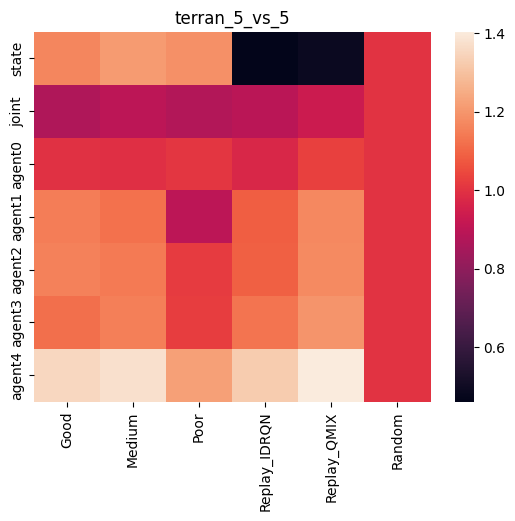

In [15]:
sns.heatmap(np.array(all_ratios),xticklabels=uids,yticklabels=keys)
plt.title("terran_5_vs_5")
plt.savefig(rel_dir+"/"+vault_name+"/"+"OACo_heatmap.png")

KEY: state


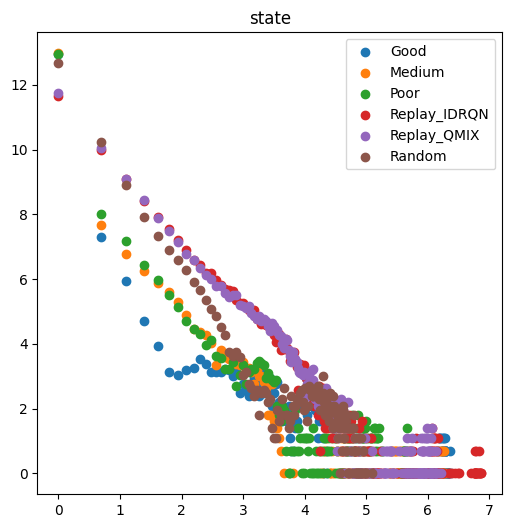

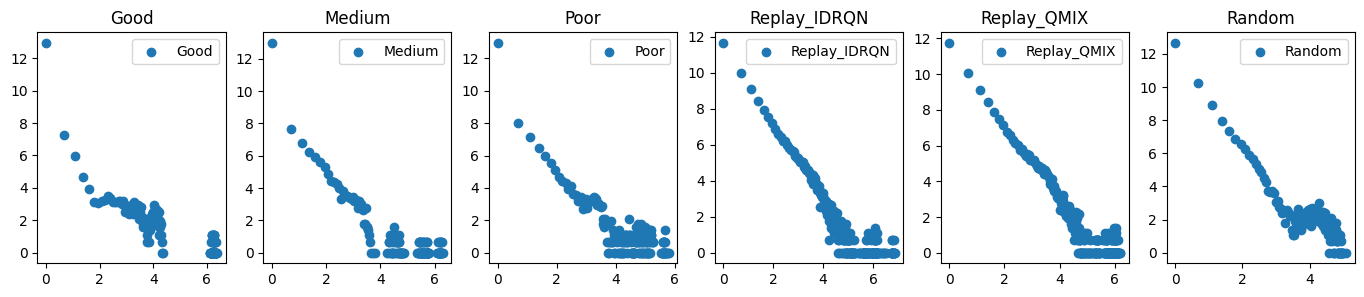

KEY: joint


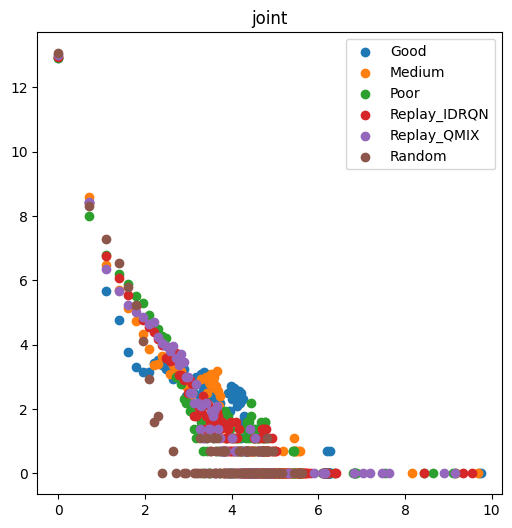

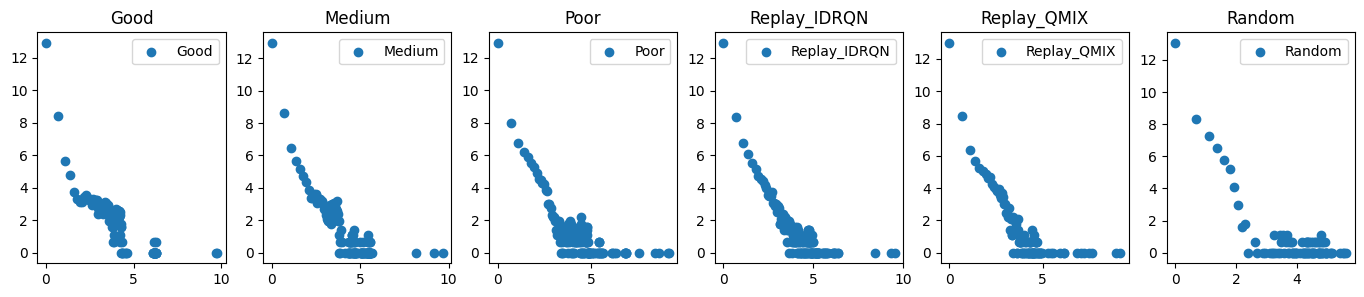

KEY: agent0


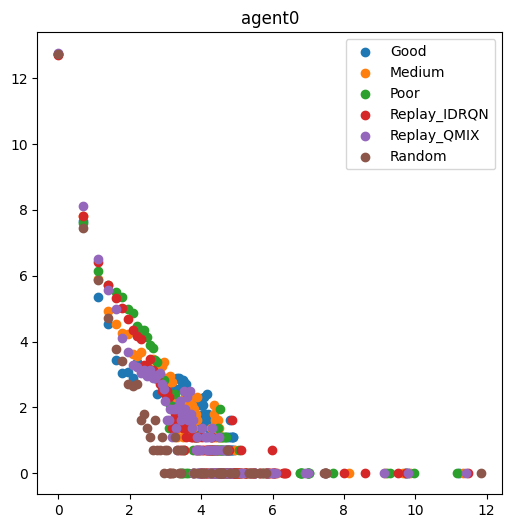

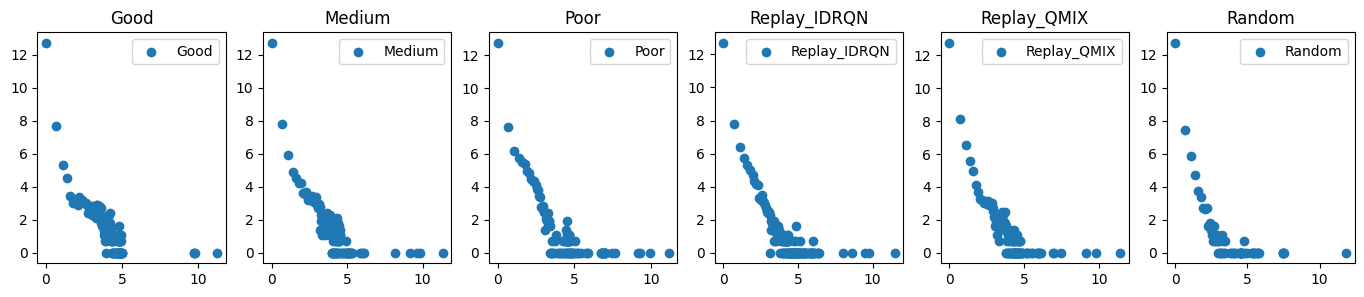

KEY: agent1


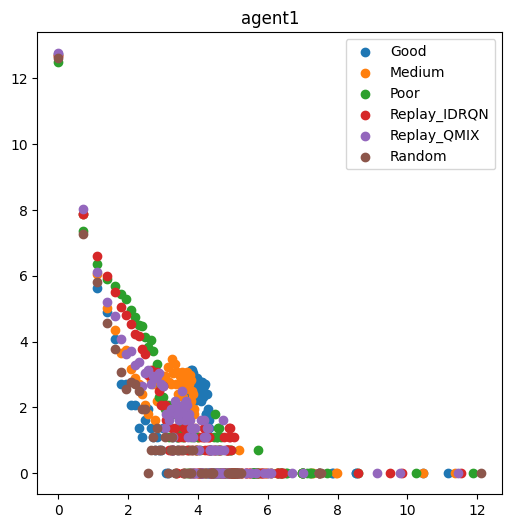

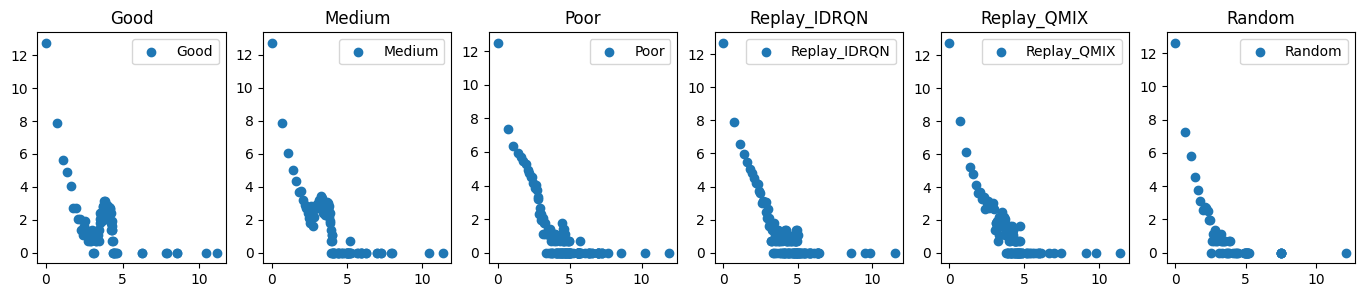

KEY: agent2


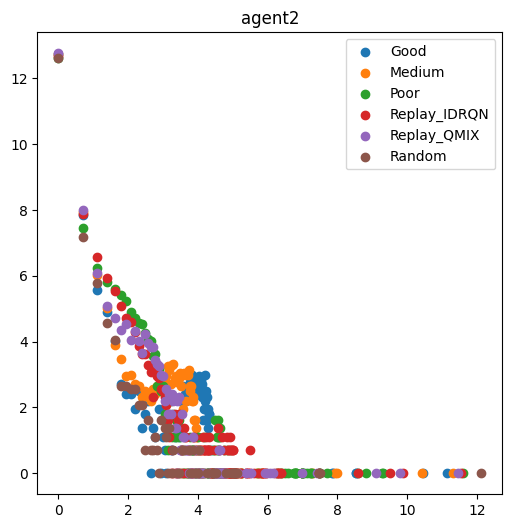

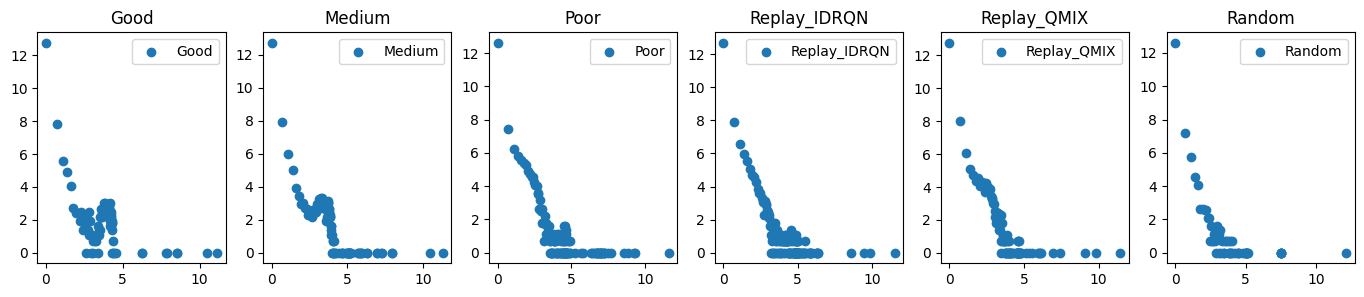

KEY: agent3


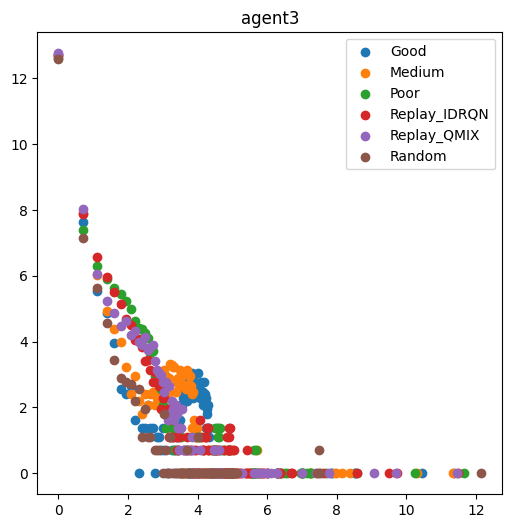

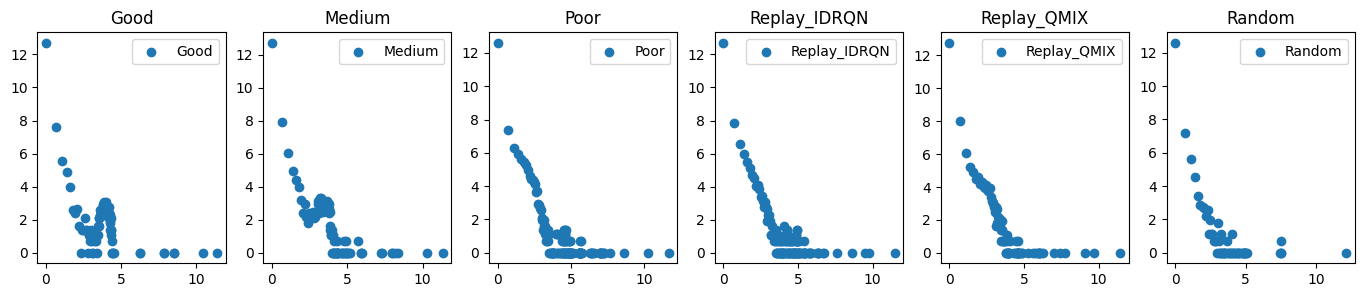

KEY: agent4


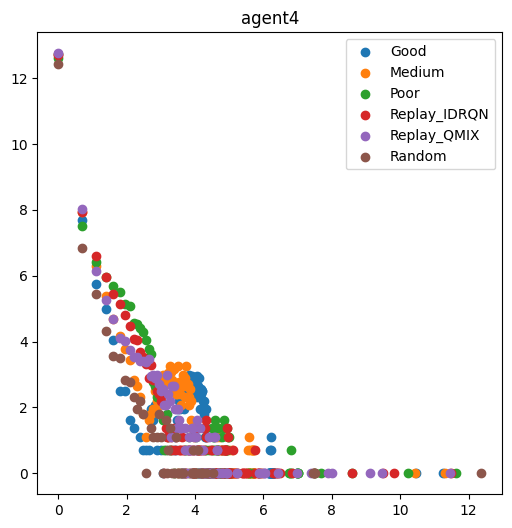

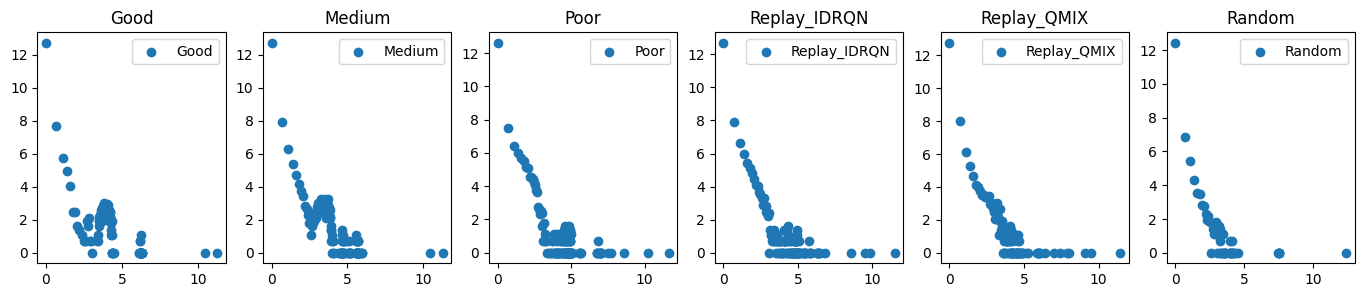

In [16]:

for key in keys:
    print("KEY: "+key)

    fig2,ax2 = plt.subplots(1,1,figsize=(6,6))

    fig, ax = plt.subplots(1,6, figsize=(17,3))

    # fig2,ax2 = plt.subplots(1,1,figsize=(6,6))

    # for the joint
    for i,uid in enumerate(uids):
        (vals,indices,counts, rewards) = counts_over_datasets[uid]
        vals2, counts2 = np.unique(counts[key],return_counts=True)

        ax[i].scatter(np.log(vals2),np.log(counts2),label=uid)
        ax[i].set_title(uid)
        ax[i].legend()

        plt.savefig(rel_dir+"/"+vault_name+"/"+key+"power_law.png")

        ax2.scatter(np.log(vals2),np.log(counts2),label=uid)
        ax2.set_title(key)
        ax2.legend()
    # plt.savefig(rel_dir+"/"+vault_name+"/"+key+"power_law.png")
    plt.show()

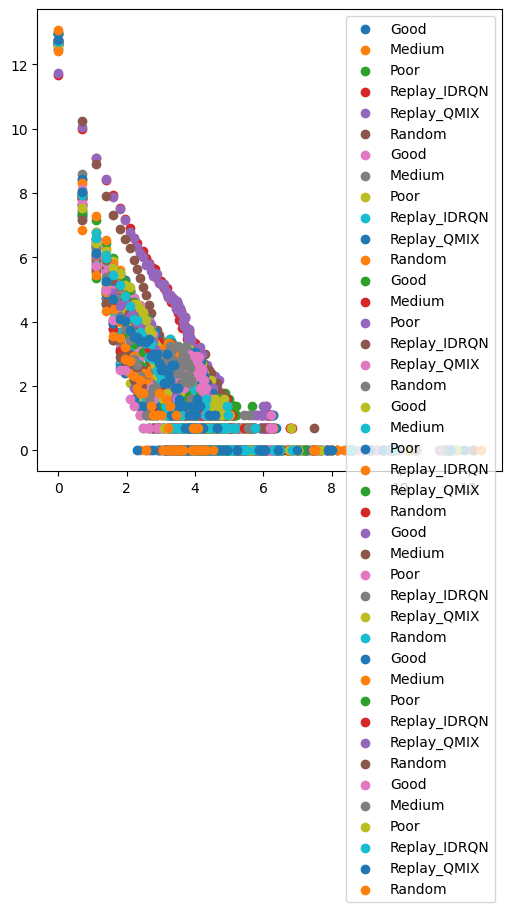

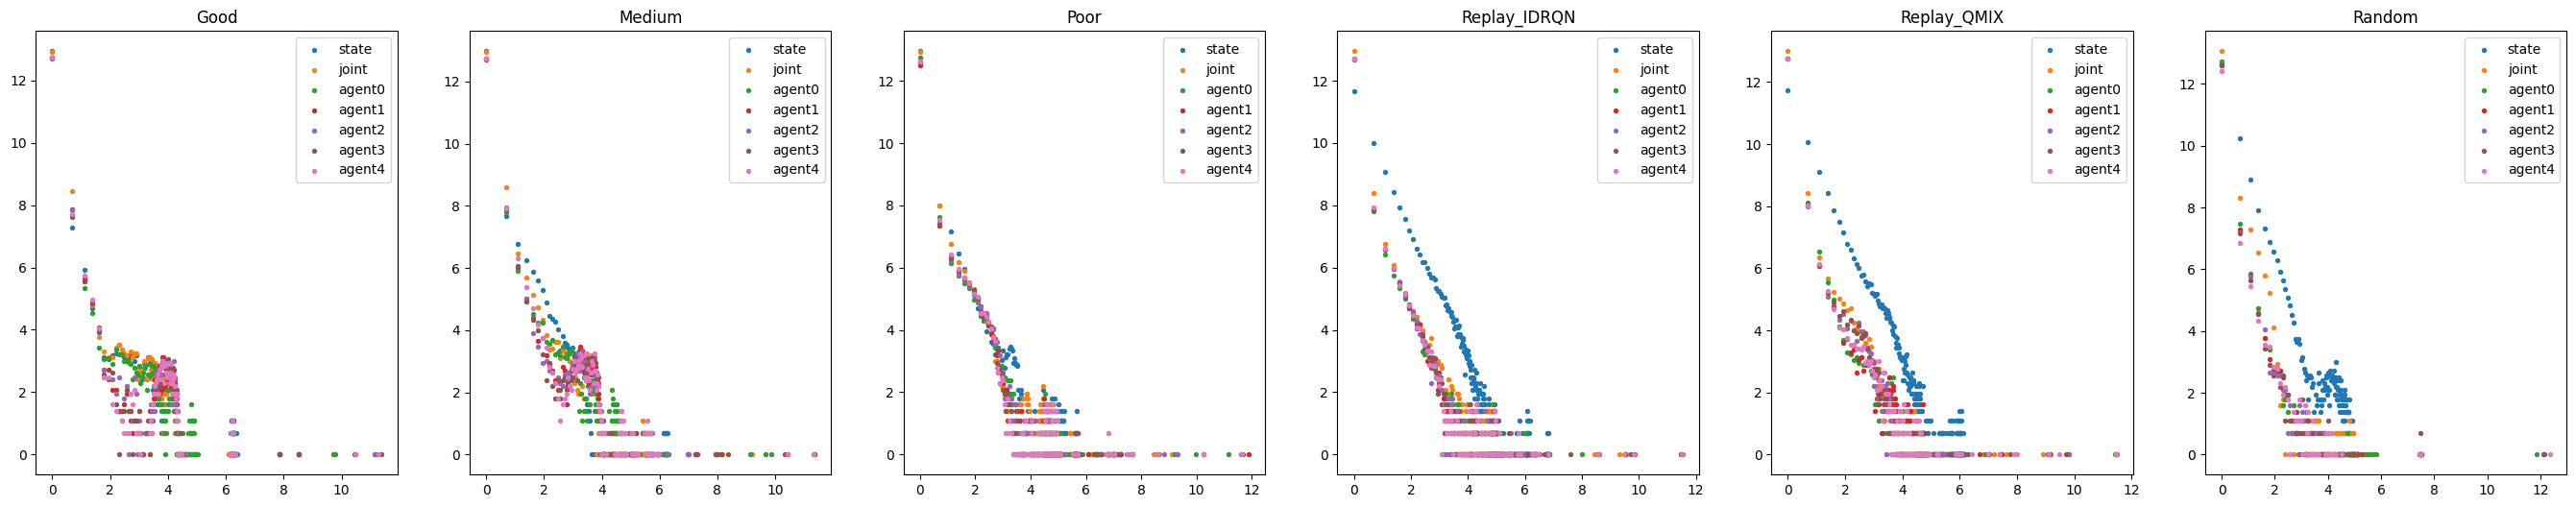

In [17]:


# keys = ["state","agent0","agent1"]#,"agent2","agent3","agent4","joint"]
# fig, ax = plt.subplots(1,5, figsize=(17,3))

fig2,ax2 = plt.subplots(1,1,figsize=(6,6))

fig, ax = plt.subplots(1,6, figsize=(34,6))

for key in keys:

    # for the joint
    for i,uid in enumerate(uids):
        (vals,indices,counts, rewards) = counts_over_datasets[uid]
        vals2, counts2 = np.unique(counts[key],return_counts=True)

        ax[i].scatter(np.log(vals2),np.log(counts2),label=key,s=8)
        ax[i].legend()
        ax[i].set_title(uid)

        ax2.scatter(np.log(vals2),np.log(counts2),label=uid)
        ax2.legend()
plt.savefig(rel_dir+"/"+vault_name+"/"+key+"power_law_superimposed.png")
plt.show()